# Análisis exploratorio de datos para el df final

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.express as px

# Leer el archivo JSON
with open('datasetRealDesde1990.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Crear lista para almacenar las filas procesadas
rows = []

for obj in data:
    # Extraer precipitation_sum para expandirlo
    precip_list = obj.get('precipitation_sum', [])
    
    # Crear una copia del objeto sin precipitation_sum
    row = {k: v for k, v in obj.items() if k != 'precipitation_sum'}
    
    # Agregar cada valor de precipitation_sum como columna individual
    for i, precip_val in enumerate(precip_list, start=1):
        row[f'precipitation_{i}'] = precip_val
    
    rows.append(row)

# Crear DataFrame
df_real = pd.DataFrame(rows)

print(f"DataFrame creado con {len(df_real)} filas y {len(df_real.columns)} columnas")
print(f"\nColumnas: {list(df_real.columns)}")
df_real.head()

DataFrame creado con 5714 filas y 16 columnas

Columnas: ['Code Departamento', 'hayRioCercano', 'distanciaRio', 'tipoDeSuelo', 'estacion', 'temperature_2m', 'total_evaporation_sum', 'volumetric_soil_water_layer_1', 'seInunda', 'precipitation_1', 'precipitation_2', 'precipitation_3', 'precipitation_4', 'precipitation_5', 'precipitation_6', 'precipitation_7']


,Code Departamento,hayRioCercano,distanciaRio,tipoDeSuelo,estacion,temperature_2m,total_evaporation_sum,volumetric_soil_water_layer_1,seInunda,precipitation_1,precipitation_2,precipitation_3,precipitation_4,precipitation_5,precipitation_6,precipitation_7
0,54028,True,8.07,Alfisoles,invierno,18.305905,1.148527,0.467691,1,34.3,26.8,36.2,46.4,10.2,15.4,3.2
1,06098,True,0.70,Miscelaneas,verano,NaN,NaN,NaN,1,17.8,0.0,14.1,12.6,41.9,9.7,15.9
2,06427,True,4.98,Molisoles,primavera,25.878348,3.236035,0.206117,1,5.9,11.9,37.4,0.0,0.0,0.2,17.7
3,50007,False,42.83,Entisoles,verano,23.260704,0.983669,0.165721,1,0.0,0.0,0.0,21.7,20.8,21.2,6.2
4,14063,False,15.81,Molisoles,verano,23.013005,3.030844,0.458341,1,0.0,62.5,0.0,0.1,0.9,0.0,0.0


In [2]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714 entries, 0 to 5713
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code Departamento              5714 non-null   object 
 1   hayRioCercano                  5714 non-null   bool   
 2   distanciaRio                   5714 non-null   float64
 3   tipoDeSuelo                    5714 non-null   object 
 4   estacion                       5714 non-null   object 
 5   temperature_2m                 5535 non-null   float64
 6   total_evaporation_sum          5535 non-null   float64
 7   volumetric_soil_water_layer_1  5535 non-null   float64
 8   seInunda                       5714 non-null   int64  
 9   precipitation_1                5709 non-null   float64
 10  precipitation_2                5709 non-null   float64
 11  precipitation_3                5709 non-null   float64
 12  precipitation_4                5709 non-null   f

In [20]:
new_df = df_real[df_real["precipitation_1"].isnull()]

# Eliminar las filas de new_df del df_real
df_real = df_real[df_real["precipitation_1"].notnull()]

print(f"Filas con precipitation_1 nulo: {len(new_df)}")
print(f"Filas restantes en df_real: {len(df_real)}")

Filas con precipitation_1 nulo: 5
Filas restantes en df_real: 5709


In [21]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5709 entries, 0 to 5713
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code Departamento              5709 non-null   object 
 1   hayRioCercano                  5709 non-null   bool   
 2   distanciaRio                   5709 non-null   float64
 3   tipoDeSuelo                    5709 non-null   object 
 4   estacion                       5709 non-null   object 
 5   temperature_2m                 5531 non-null   float64
 6   total_evaporation_sum          5531 non-null   float64
 7   volumetric_soil_water_layer_1  5531 non-null   float64
 8   seInunda                       5709 non-null   int64  
 9   precipitation_1                5709 non-null   float64
 10  precipitation_2                5709 non-null   float64
 11  precipitation_3                5709 non-null   float64
 12  precipitation_4                5709 non-null   float6

### Chau filas con faltantes de ee

In [23]:
# Eliminar filas con temperature_2m nulo
filas_antes = len(df_real)
df_real = df_real[df_real["temperature_2m"].notnull()]

# Reordenar el índice
df_real = df_real.reset_index(drop=True)

filas_eliminadas = filas_antes - len(df_real)
print(f"Filas eliminadas con temperature_2m nulo: {filas_eliminadas}")
print(f"Filas restantes en df_real: {len(df_real)}")
df_real.info()

Filas eliminadas con temperature_2m nulo: 0
Filas restantes en df_real: 5531
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531 entries, 0 to 5530
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code Departamento              5531 non-null   object 
 1   hayRioCercano                  5531 non-null   bool   
 2   distanciaRio                   5531 non-null   float64
 3   tipoDeSuelo                    5531 non-null   object 
 4   estacion                       5531 non-null   object 
 5   temperature_2m                 5531 non-null   float64
 6   total_evaporation_sum          5531 non-null   float64
 7   volumetric_soil_water_layer_1  5531 non-null   float64
 8   seInunda                       5531 non-null   int64  
 9   precipitation_1                5531 non-null   float64
 10  precipitation_2                5531 non-null   float64
 11  precipitation_3                

C:\Users\COMPU\AppData\Local\Temp\ipykernel_4712\3955446613.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\COMPU\AppData\Local\Temp\ipykernel_4712\3955446613.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)


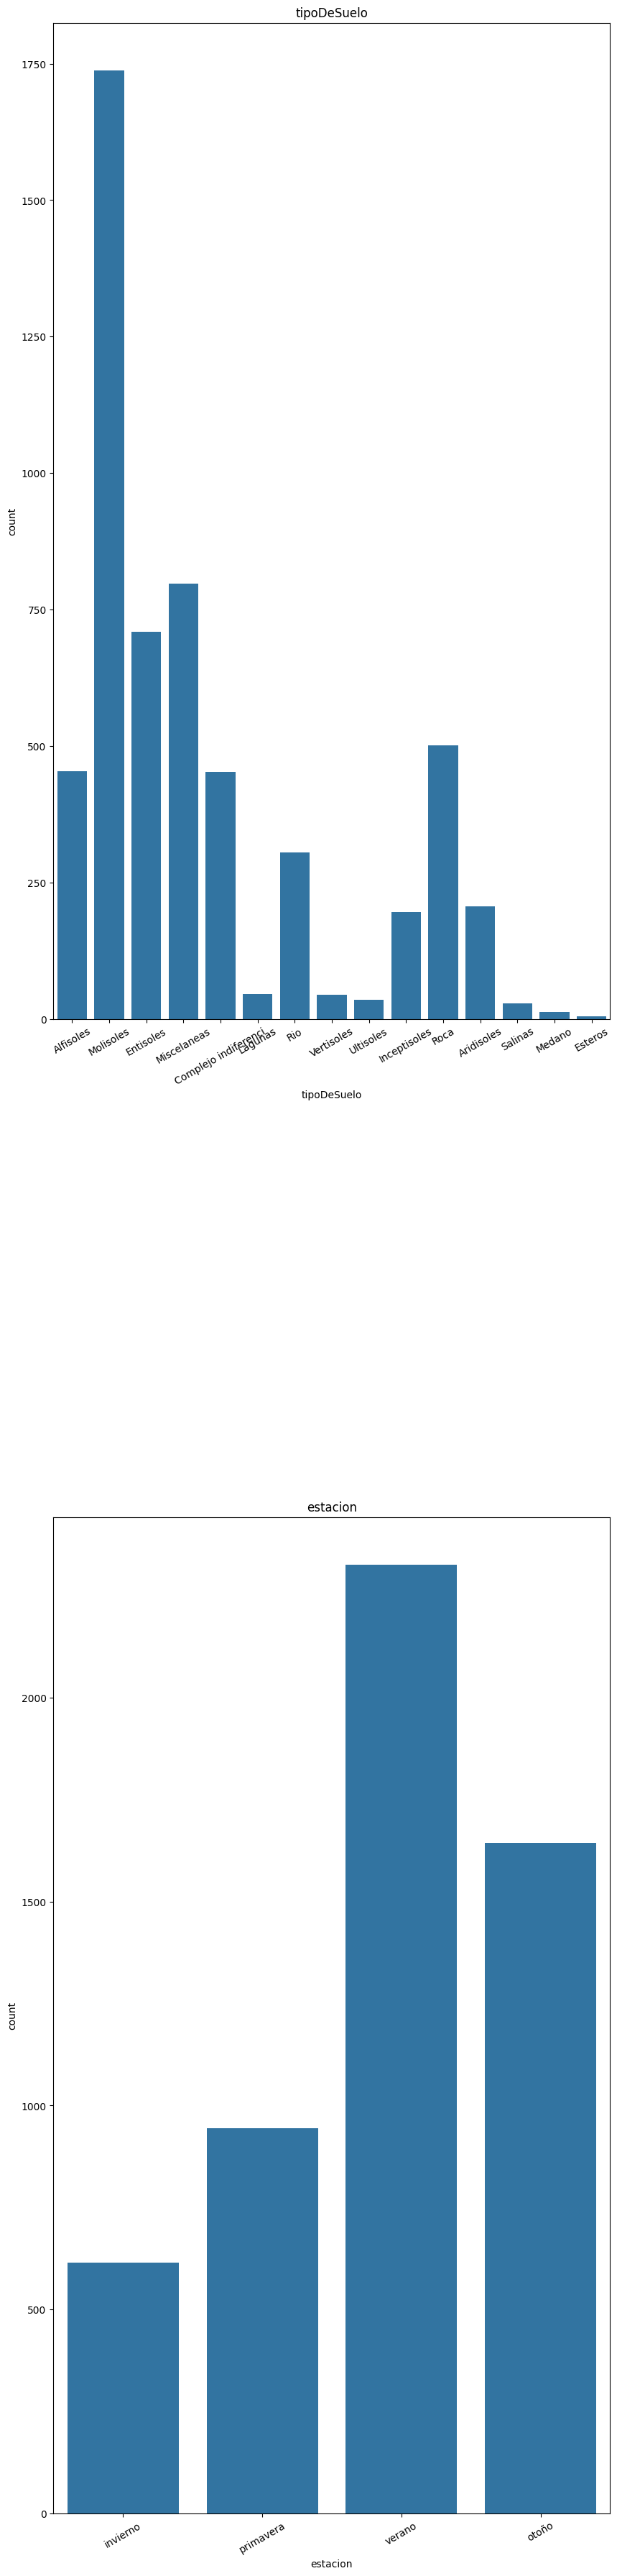

In [26]:
# Tomemos las variables categóricas y generemos gráficos de barras

col_cat = ['tipoDeSuelo', 'estacion']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=df_real, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Columnas flotantes encontradas: 11
Columnas: ['distanciaRio', 'temperature_2m', 'total_evaporation_sum', 'volumetric_soil_water_layer_1', 'precipitation_1', 'precipitation_2', 'precipitation_3', 'precipitation_4', 'precipitation_5', 'precipitation_6', 'precipitation_7']



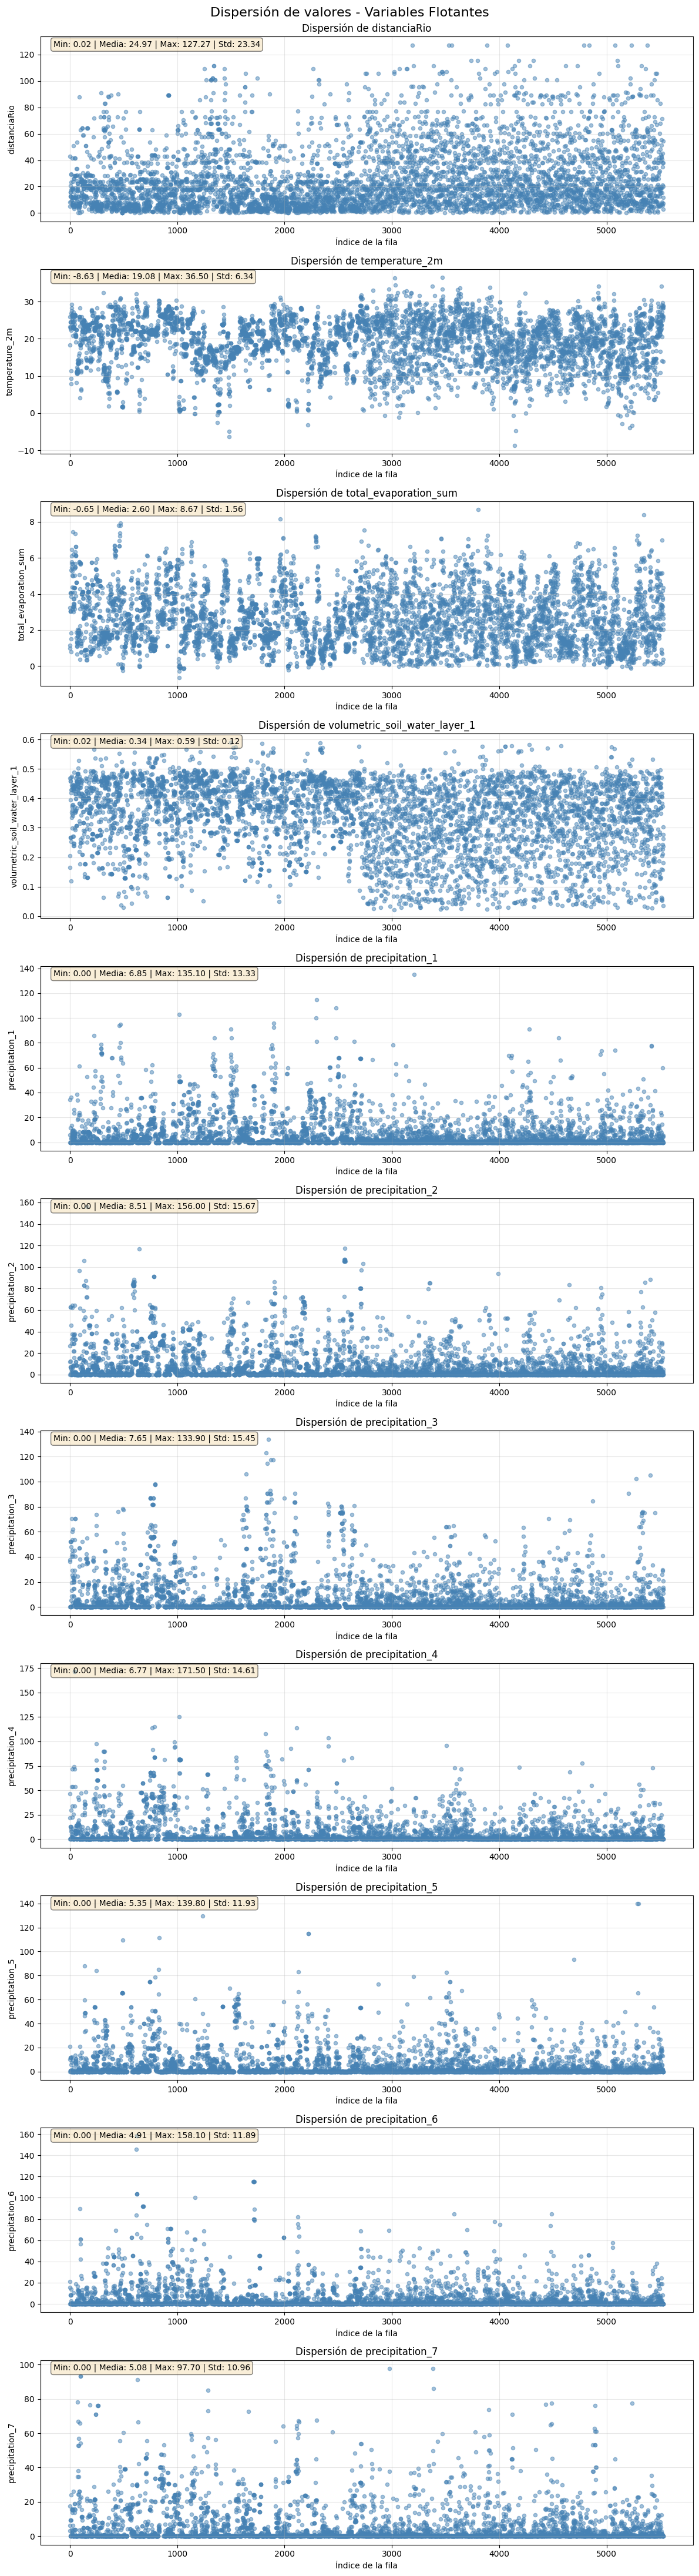


Resumen estadístico de todas las columnas flotantes:
       distanciaRio  temperature_2m  total_evaporation_sum  \
count   5531.000000     5531.000000            5531.000000   
mean      24.966353       19.081734               2.598097   
std       23.342521        6.344748               1.559063   
min        0.020000       -8.631712              -0.645205   
25%        7.490000       15.158013               1.383388   
50%       17.600000       19.964910               2.400213   
75%       35.720000       23.896261               3.657088   
max      127.270000       36.504867               8.673536   

       volumetric_soil_water_layer_1  precipitation_1  precipitation_2  \
count                    5531.000000      5531.000000      5531.000000   
mean                        0.340043         6.850371         8.507449   
std                         0.118615        13.326399        15.673239   
min                         0.021276         0.000000         0.000000   
25%              

In [40]:
# Gráficos de dispersión para todas las columnas con valores flotantes
import numpy as np

# Seleccionar solo columnas numéricas con tipo float
float_cols = df_real.select_dtypes(include=['float64', 'float32']).columns.tolist()

print(f"Columnas flotantes encontradas: {len(float_cols)}")
print(f"Columnas: {float_cols}\n")

# Crear gráficos de dispersión
n_cols = len(float_cols)
fig, axes = plt.subplots(nrows=n_cols, ncols=1, figsize=(12, 4*n_cols))
fig.suptitle('Dispersión de valores - Variables Flotantes', fontsize=16, y=0.995)

# Manejar caso de una sola columna
if n_cols == 1:
    axes = [axes]

for idx, col_name in enumerate(float_cols):
    ax = axes[idx]
    
    ax.scatter(df_real.index, df_real[col_name], alpha=0.5, s=20, color='steelblue')
    ax.set_xlabel('Índice de la fila')
    ax.set_ylabel(f'{col_name}')
    ax.set_title(f'Dispersión de {col_name}')
    ax.grid(True, alpha=0.3)
    
    # Estadísticas en el gráfico
    mean_val = df_real[col_name].mean()
    max_val = df_real[col_name].max()
    min_val = df_real[col_name].min()
    std_val = df_real[col_name].std()
    ax.text(0.02, 0.98, f'Min: {min_val:.2f} | Media: {mean_val:.2f} | Max: {max_val:.2f} | Std: {std_val:.2f}', 
            transform=ax.transAxes, verticalalignment='top', 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Resumen estadístico
print("\nResumen estadístico de todas las columnas flotantes:")
print(df_real[float_cols].describe())

## Precipitaciones todo OK.
### Te amamos OpenMeteo :)

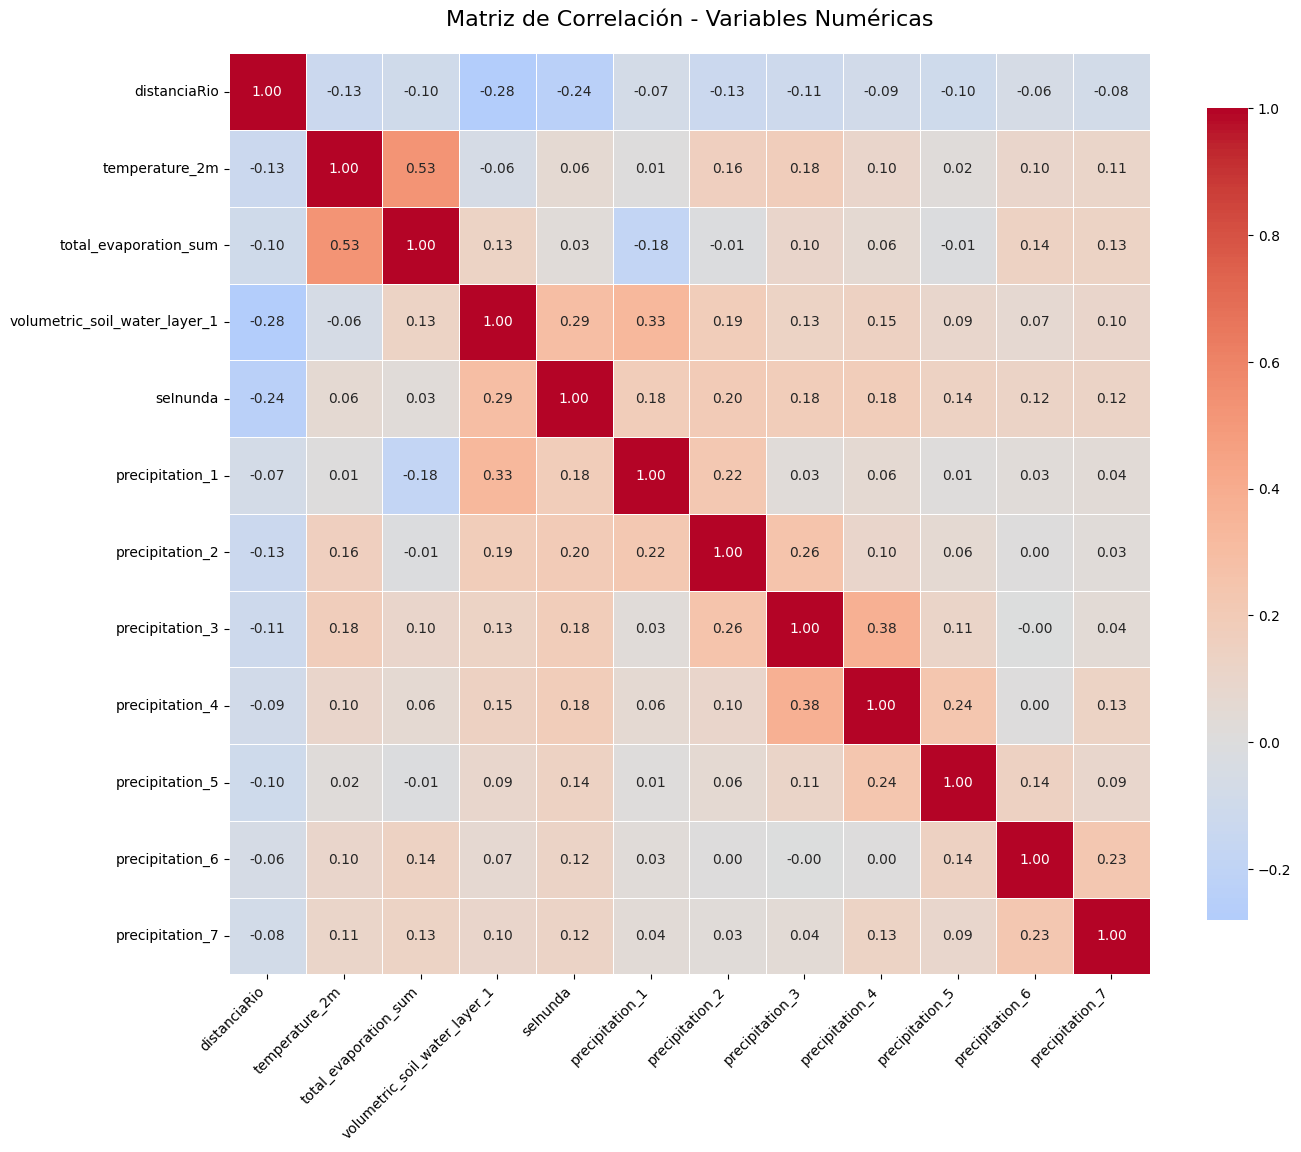


Correlaciones con 'seInunda' (ordenadas por valor absoluto):
volumetric_soil_water_layer_1    0.294805
distanciaRio                    -0.237980
precipitation_2                  0.195742
precipitation_4                  0.183355
precipitation_1                  0.182291
precipitation_3                  0.182264
precipitation_5                  0.135383
precipitation_7                  0.120867
precipitation_6                  0.120746
temperature_2m                   0.063394
total_evaporation_sum            0.025846
Name: seInunda, dtype: float64


In [39]:
# Matriz de correlación
# Seleccionar solo columnas numéricas
import numpy as np

numeric_cols = df_real.select_dtypes(include=[np.number]).columns.tolist()

# Calcular matriz de correlación
correlation_matrix = df_real[numeric_cols].corr()

# Visualizar con heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Correlaciones más fuertes con seInunda
print("\nCorrelaciones con 'seInunda' (ordenadas por valor absoluto):")
if 'seInunda' in correlation_matrix.columns:
    correlations_with_target = correlation_matrix['seInunda'].drop('seInunda').sort_values(key=abs, ascending=False)
    print(correlations_with_target)

## BELLEZAA, ninguna correlacionada. uff

In [41]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531 entries, 0 to 5530
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code Departamento              5531 non-null   object 
 1   hayRioCercano                  5531 non-null   bool   
 2   distanciaRio                   5531 non-null   float64
 3   tipoDeSuelo                    5531 non-null   object 
 4   estacion                       5531 non-null   object 
 5   temperature_2m                 5531 non-null   float64
 6   total_evaporation_sum          5531 non-null   float64
 7   volumetric_soil_water_layer_1  5531 non-null   float64
 8   seInunda                       5531 non-null   int64  
 9   precipitation_1                5531 non-null   float64
 10  precipitation_2                5531 non-null   float64
 11  precipitation_3                5531 non-null   float64
 12  precipitation_4                5531 non-null   f

In [42]:
# Mover la columna 'seInunda' al final
col_target = 'seInunda'
df_real = df_real[[c for c in df_real.columns if c != col_target] + [col_target]]
df_real


,Code Departamento,hayRioCercano,distanciaRio,tipoDeSuelo,estacion,temperature_2m,total_evaporation_sum,volumetric_soil_water_layer_1,precipitation_1,precipitation_2,precipitation_3,precipitation_4,precipitation_5,precipitation_6,precipitation_7,seInunda
0,54028,True,8.07,Alfisoles,invierno,18.305905,1.148527,0.467691,34.3,26.8,36.2,46.4,10.2,15.4,3.2,1
1,06427,True,4.98,Molisoles,primavera,25.878348,3.236035,0.206117,5.9,11.9,37.4,0.0,0.0,0.2,17.7,1
2,50007,False,42.83,Entisoles,verano,23.260704,0.983669,0.165721,0.0,0.0,0.0,21.7,20.8,21.2,6.2,1
3,14063,False,15.81,Molisoles,verano,23.013005,3.030844,0.458341,0.0,62.5,0.0,0.1,0.9,0.0,0.0,1
4,14063,False,15.81,Molisoles,verano,23.013005,3.030844,0.458341,0.0,62.5,0.0,0.1,0.9,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5526,34035,True,11.81,Rio,verano,26.132272,2.871879,0.302268,4.7,2.8,14.2,0.2,0.0,0.0,0.0,0
5527,06532,False,20.35,Molisoles,verano,28.744414,2.309768,0.277387,0.0,0.3,13.7,0.0,0.0,0.0,0.1,0
5528,26098,False,54.35,Aridisoles,verano,13.946970,0.361782,0.035291,5.3,0.0,0.0,0.3,0.0,0.0,0.0,0
5529,02015,True,2.81,Miscelaneas,verano,28.256377,2.631292,0.181800,0.0,0.3,20.5,0.0,0.0,0.0,0.0,0


In [43]:
# Crear 3 versiones del dataset con diferentes criterios de proximidad al río

# Función para ajustar hayRioCercano e intercambiar columnas
def crear_csv_con_criterio(df, distancia_max, nombre_archivo):
    # Crear copia del dataframe
    df_copia = df.copy()
    
    # Redefinir hayRioCercano según el criterio de distancia
    df_copia['hayRioCercano'] = df_copia['distanciaRio'] <= distancia_max
    
    # Obtener lista de columnas
    columnas = df_copia.columns.tolist()
    
    # Encontrar posiciones de las columnas a intercambiar
    idx_distancia = columnas.index('distanciaRio')
    idx_hay_rio = columnas.index('hayRioCercano')
    
    # Intercambiar posiciones
    columnas[idx_distancia], columnas[idx_hay_rio] = columnas[idx_hay_rio], columnas[idx_distancia]
    
    # Reordenar el dataframe
    df_copia = df_copia[columnas]
    
    # Guardar CSV
    df_copia.to_csv(nombre_archivo, index=False)
    
    # Estadísticas
    total = len(df_copia)
    con_rio = df_copia['hayRioCercano'].sum()
    sin_rio = total - con_rio
    
    print(f"\n{nombre_archivo}:")
    print(f"  Criterio: distanciaRio <= {distancia_max} km")
    print(f"  Total de filas: {total}")
    print(f"  hayRioCercano = True: {con_rio} ({100*con_rio/total:.1f}%)")
    print(f"  hayRioCercano = False: {sin_rio} ({100*sin_rio/total:.1f}%)")
    
    return df_copia

# Crear los 3 archivos CSV
print("Creando archivos CSV con diferentes criterios de proximidad al río...")

df_2km = crear_csv_con_criterio(df_real, 2, 'dataset_rio_2km.csv')
df_5km = crear_csv_con_criterio(df_real, 5, 'dataset_rio_5km.csv')
df_10km = crear_csv_con_criterio(df_real, 10, 'dataset_rio_10km.csv')

print("\n✓ Archivos CSV creados exitosamente")
print("\nPrimeras filas del dataset con criterio 2km:")
df_2km.head()

Creando archivos CSV con diferentes criterios de proximidad al río...

dataset_rio_2km.csv:
  Criterio: distanciaRio <= 2 km
  Total de filas: 5531
  hayRioCercano = True: 303 (5.5%)
  hayRioCercano = False: 5228 (94.5%)

dataset_rio_5km.csv:
  Criterio: distanciaRio <= 5 km
  Total de filas: 5531
  hayRioCercano = True: 960 (17.4%)
  hayRioCercano = False: 4571 (82.6%)

dataset_rio_10km.csv:
  Criterio: distanciaRio <= 10 km
  Total de filas: 5531
  hayRioCercano = True: 1748 (31.6%)
  hayRioCercano = False: 3783 (68.4%)

✓ Archivos CSV creados exitosamente

Primeras filas del dataset con criterio 2km:

dataset_rio_5km.csv:
  Criterio: distanciaRio <= 5 km
  Total de filas: 5531
  hayRioCercano = True: 960 (17.4%)
  hayRioCercano = False: 4571 (82.6%)

dataset_rio_10km.csv:
  Criterio: distanciaRio <= 10 km
  Total de filas: 5531
  hayRioCercano = True: 1748 (31.6%)
  hayRioCercano = False: 3783 (68.4%)

✓ Archivos CSV creados exitosamente

Primeras filas del dataset con criterio 2km:

,Code Departamento,distanciaRio,hayRioCercano,tipoDeSuelo,estacion,temperature_2m,total_evaporation_sum,volumetric_soil_water_layer_1,precipitation_1,precipitation_2,precipitation_3,precipitation_4,precipitation_5,precipitation_6,precipitation_7,seInunda
0,54028,8.07,False,Alfisoles,invierno,18.305905,1.148527,0.467691,34.3,26.8,36.2,46.4,10.2,15.4,3.2,1
1,06427,4.98,False,Molisoles,primavera,25.878348,3.236035,0.206117,5.9,11.9,37.4,0.0,0.0,0.2,17.7,1
2,50007,42.83,False,Entisoles,verano,23.260704,0.983669,0.165721,0.0,0.0,0.0,21.7,20.8,21.2,6.2,1
3,14063,15.81,False,Molisoles,verano,23.013005,3.030844,0.458341,0.0,62.5,0.0,0.1,0.9,0.0,0.0,1
4,14063,15.81,False,Molisoles,verano,23.013005,3.030844,0.458341,0.0,62.5,0.0,0.1,0.9,0.0,0.0,1


In [44]:
# Crear versiones de los CSVs con precipitation_week en lugar de precipitation_1 a precipitation_7

def crear_csv_con_precip_week(df, nombre_salida):
    # Crear copia del dataframe
    df_copia = df.copy()
    
    # Columnas de precipitación a sumar
    precip_cols = [f'precipitation_{i}' for i in range(1, 8)]
    
    # Crear la nueva columna precipitation_week sumando las 7 columnas
    df_copia['precipitation_week'] = df_copia[precip_cols].sum(axis=1)
    
    # Eliminar las columnas individuales de precipitación
    df_copia = df_copia.drop(columns=precip_cols)
    
    # Guardar CSV
    df_copia.to_csv(nombre_salida, index=False)
    
    # Estadísticas
    print(f"\n{nombre_salida}:")
    print(f"  Total de filas: {len(df_copia)}")
    print(f"  Columnas: {len(df_copia.columns)}")
    print(f"  precipitation_week - Min: {df_copia['precipitation_week'].min():.2f} mm")
    print(f"  precipitation_week - Media: {df_copia['precipitation_week'].mean():.2f} mm")
    print(f"  precipitation_week - Max: {df_copia['precipitation_week'].max():.2f} mm")
    
    return df_copia

# Crear los 3 archivos CSV con precipitation_week
print("Creando archivos CSV con precipitation_week...")

df_2km_week = crear_csv_con_precip_week(df_2km, 'dataset_rio_2km_week.csv')
df_5km_week = crear_csv_con_precip_week(df_5km, 'dataset_rio_5km_week.csv')
df_10km_week = crear_csv_con_precip_week(df_10km, 'dataset_rio_10km_week.csv')

print("\n✓ Archivos CSV con precipitation_week creados exitosamente")
print(f"\nColumnas del nuevo dataset:")
print(df_2km_week.columns.tolist())
print("\nPrimeras filas del dataset 2km con precipitation_week:")
df_2km_week.head()

Creando archivos CSV con precipitation_week...

dataset_rio_2km_week.csv:
  Total de filas: 5531
  Columnas: 10
  precipitation_week - Min: 0.00 mm
  precipitation_week - Media: 45.12 mm
  precipitation_week - Max: 347.80 mm

dataset_rio_5km_week.csv:
  Total de filas: 5531
  Columnas: 10
  precipitation_week - Min: 0.00 mm
  precipitation_week - Media: 45.12 mm
  precipitation_week - Max: 347.80 mm

dataset_rio_10km_week.csv:
  Total de filas: 5531
  Columnas: 10
  precipitation_week - Min: 0.00 mm
  precipitation_week - Media: 45.12 mm
  precipitation_week - Max: 347.80 mm

✓ Archivos CSV con precipitation_week creados exitosamente

Columnas del nuevo dataset:
['Code Departamento', 'distanciaRio', 'hayRioCercano', 'tipoDeSuelo', 'estacion', 'temperature_2m', 'total_evaporation_sum', 'volumetric_soil_water_layer_1', 'seInunda', 'precipitation_week']

Primeras filas del dataset 2km con precipitation_week:


,Code Departamento,distanciaRio,hayRioCercano,tipoDeSuelo,estacion,temperature_2m,total_evaporation_sum,volumetric_soil_water_layer_1,seInunda,precipitation_week
0,54028,8.07,False,Alfisoles,invierno,18.305905,1.148527,0.467691,1,172.5
1,06427,4.98,False,Molisoles,primavera,25.878348,3.236035,0.206117,1,73.1
2,50007,42.83,False,Entisoles,verano,23.260704,0.983669,0.165721,1,69.9
3,14063,15.81,False,Molisoles,verano,23.013005,3.030844,0.458341,1,63.5
4,14063,15.81,False,Molisoles,verano,23.013005,3.030844,0.458341,1,63.5


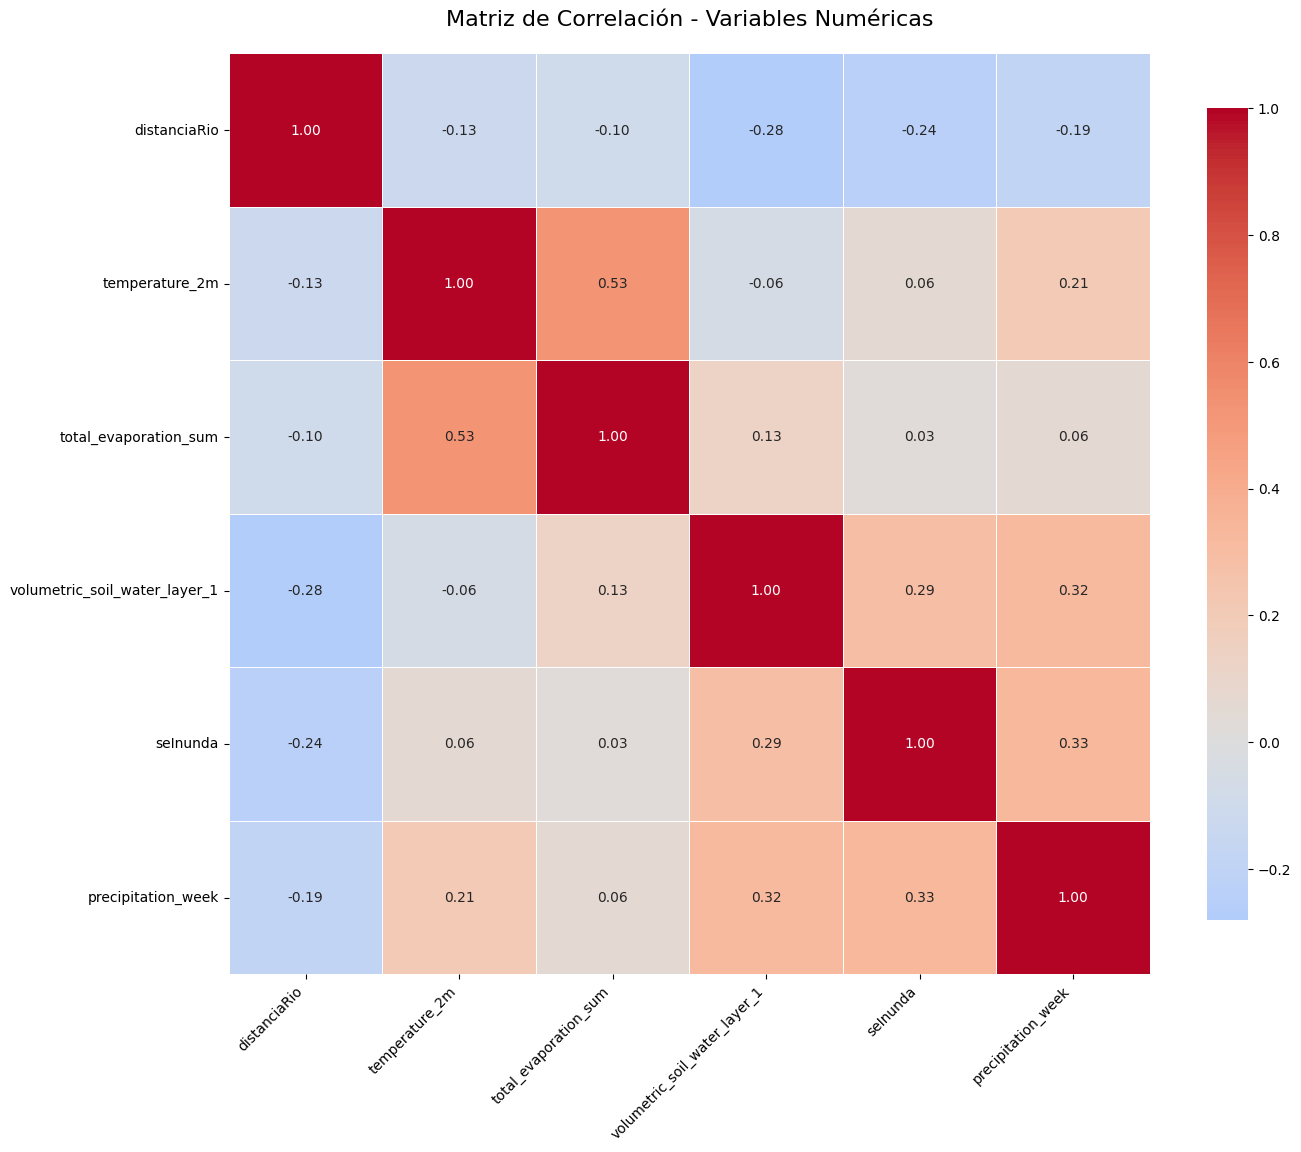


Correlaciones con 'seInunda' (ordenadas por valor absoluto):
precipitation_week               0.334641
volumetric_soil_water_layer_1    0.294805
distanciaRio                    -0.237980
temperature_2m                   0.063394
total_evaporation_sum            0.025846
Name: seInunda, dtype: float64


In [45]:
# Matriz de correlación
# Seleccionar solo columnas numéricas
import numpy as np

numeric_cols = df_2km_week.select_dtypes(include=[np.number]).columns.tolist()

# Calcular matriz de correlación
correlation_matrix = df_2km_week[numeric_cols].corr()

# Visualizar con heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Correlaciones más fuertes con seInunda
print("\nCorrelaciones con 'seInunda' (ordenadas por valor absoluto):")
if 'seInunda' in correlation_matrix.columns:
    correlations_with_target = correlation_matrix['seInunda'].drop('seInunda').sort_values(key=abs, ascending=False)
    print(correlations_with_target)

In [47]:
df = pd.read_csv('dataset_rio_2km_week.csv')
df


,Code Departamento,distanciaRio,hayRioCercano,tipoDeSuelo,estacion,temperature_2m,total_evaporation_sum,volumetric_soil_water_layer_1,seInunda,precipitation_week
0,54028,8.07,False,Alfisoles,invierno,18.305905,1.148527,0.467691,1,172.5
1,6427,4.98,False,Molisoles,primavera,25.878348,3.236035,0.206117,1,73.1
2,50007,42.83,False,Entisoles,verano,23.260704,0.983669,0.165721,1,69.9
3,14063,15.81,False,Molisoles,verano,23.013005,3.030844,0.458341,1,63.5
4,14063,15.81,False,Molisoles,verano,23.013005,3.030844,0.458341,1,63.5
...,...,...,...,...,...,...,...,...,...,...
5526,34035,11.81,False,Rio,verano,26.132272,2.871879,0.302268,0,21.9
5527,6532,20.35,False,Molisoles,verano,28.744414,2.309768,0.277387,0,14.1
5528,26098,54.35,False,Aridisoles,verano,13.946970,0.361782,0.035291,0,5.6
5529,2015,2.81,False,Miscelaneas,verano,28.256377,2.631292,0.181800,0,20.8


In [48]:
# Aplicar One-Hot Encoding a las columnas categóricas y crear nuevos CSVs

def aplicar_one_hot_encoding(df, nombre_salida):
    # Crear copia del dataframe
    df_copia = df.copy()
    
    # Columnas categóricas a codificar
    columnas_categoricas = ['tipoDeSuelo', 'estacion']
    
    # Aplicar One-Hot Encoding usando pd.get_dummies
    df_encoded = pd.get_dummies(df_copia, columns=columnas_categoricas, prefix=columnas_categoricas, drop_first=False)
    
    # Guardar CSV
    df_encoded.to_csv(nombre_salida, index=False)
    
    # Estadísticas
    print(f"\n{nombre_salida}:")
    print(f"  Total de filas: {len(df_encoded)}")
    print(f"  Columnas originales: {len(df_copia.columns)}")
    print(f"  Columnas después de One-Hot: {len(df_encoded.columns)}")
    print(f"  Nuevas columnas creadas: {len(df_encoded.columns) - len(df_copia.columns)}")
    
    return df_encoded

# Aplicar One-Hot Encoding a los 6 datasets
print("Aplicando One-Hot Encoding a los datasets...")

# Datasets con precipitaciones diarias
df_2km_encoded = aplicar_one_hot_encoding(df_2km, 'dataset_rio_2km_encoded.csv')
df_5km_encoded = aplicar_one_hot_encoding(df_5km, 'dataset_rio_5km_encoded.csv')
df_10km_encoded = aplicar_one_hot_encoding(df_10km, 'dataset_rio_10km_encoded.csv')

# Datasets con precipitation_week
df_2km_week_encoded = aplicar_one_hot_encoding(df_2km_week, 'dataset_rio_2km_week_encoded.csv')
df_5km_week_encoded = aplicar_one_hot_encoding(df_5km_week, 'dataset_rio_5km_week_encoded.csv')
df_10km_week_encoded = aplicar_one_hot_encoding(df_10km_week, 'dataset_rio_10km_week_encoded.csv')

print("\n✓ Todos los archivos con One-Hot Encoding creados exitosamente")
print("\nColumnas del dataset 2km_week con encoding:")
print(df_2km_week_encoded.columns.tolist())
print("\nPrimeras filas:")
df_2km_week_encoded.head()

Aplicando One-Hot Encoding a los datasets...

dataset_rio_2km_encoded.csv:
  Total de filas: 5531
  Columnas originales: 16
  Columnas después de One-Hot: 33
  Nuevas columnas creadas: 17

dataset_rio_5km_encoded.csv:
  Total de filas: 5531
  Columnas originales: 16
  Columnas después de One-Hot: 33
  Nuevas columnas creadas: 17

dataset_rio_10km_encoded.csv:
  Total de filas: 5531
  Columnas originales: 16
  Columnas después de One-Hot: 33
  Nuevas columnas creadas: 17

dataset_rio_2km_week_encoded.csv:
  Total de filas: 5531
  Columnas originales: 10
  Columnas después de One-Hot: 27
  Nuevas columnas creadas: 17

dataset_rio_5km_week_encoded.csv:
  Total de filas: 5531
  Columnas originales: 10
  Columnas después de One-Hot: 27
  Nuevas columnas creadas: 17

dataset_rio_10km_week_encoded.csv:
  Total de filas: 5531
  Columnas originales: 10
  Columnas después de One-Hot: 27
  Nuevas columnas creadas: 17

✓ Todos los archivos con One-Hot Encoding creados exitosamente

Columnas del da

,Code Departamento,distanciaRio,hayRioCercano,temperature_2m,total_evaporation_sum,volumetric_soil_water_layer_1,seInunda,precipitation_week,tipoDeSuelo_Alfisoles,tipoDeSuelo_Aridisoles,...,tipoDeSuelo_Molisoles,tipoDeSuelo_Rio,tipoDeSuelo_Roca,tipoDeSuelo_Salinas,tipoDeSuelo_Ultisoles,tipoDeSuelo_Vertisoles,estacion_invierno,estacion_otoño,estacion_primavera,estacion_verano
0,54028,8.07,False,18.305905,1.148527,0.467691,1,172.5,True,False,...,False,False,False,False,False,False,True,False,False,False
1,06427,4.98,False,25.878348,3.236035,0.206117,1,73.1,False,False,...,True,False,False,False,False,False,False,False,True,False
2,50007,42.83,False,23.260704,0.983669,0.165721,1,69.9,False,False,...,False,False,False,False,False,False,False,False,False,True
3,14063,15.81,False,23.013005,3.030844,0.458341,1,63.5,False,False,...,True,False,False,False,False,False,False,False,False,True
4,14063,15.81,False,23.013005,3.030844,0.458341,1,63.5,False,False,...,True,False,False,False,False,False,False,False,False,True


In [53]:
df_2km_week_encoded.columns.unique()

Index(['Code Departamento', 'distanciaRio', 'hayRioCercano', 'temperature_2m',
       'total_evaporation_sum', 'volumetric_soil_water_layer_1', 'seInunda',
       'precipitation_week', 'tipoDeSuelo_Alfisoles', 'tipoDeSuelo_Aridisoles',
       'tipoDeSuelo_Complejo indiferenci', 'tipoDeSuelo_Entisoles',
       'tipoDeSuelo_Esteros', 'tipoDeSuelo_Inceptisoles',
       'tipoDeSuelo_Lagunas', 'tipoDeSuelo_Medano', 'tipoDeSuelo_Miscelaneas',
       'tipoDeSuelo_Molisoles', 'tipoDeSuelo_Rio', 'tipoDeSuelo_Roca',
       'tipoDeSuelo_Salinas', 'tipoDeSuelo_Ultisoles',
       'tipoDeSuelo_Vertisoles', 'estacion_invierno', 'estacion_otoño',
       'estacion_primavera', 'estacion_verano'],
      dtype='object')

In [55]:
# Mover la columna 'seInunda' al final
col_target = 'seInunda'
df_2km_week_encoded = df_2km_week_encoded[[c for c in df_2km_week_encoded.columns if c != col_target] + [col_target]]
df_2km_week_encoded.columns


Index(['Code Departamento', 'distanciaRio', 'hayRioCercano', 'temperature_2m',
       'total_evaporation_sum', 'volumetric_soil_water_layer_1',
       'precipitation_week', 'tipoDeSuelo_Alfisoles', 'tipoDeSuelo_Aridisoles',
       'tipoDeSuelo_Complejo indiferenci', 'tipoDeSuelo_Entisoles',
       'tipoDeSuelo_Esteros', 'tipoDeSuelo_Inceptisoles',
       'tipoDeSuelo_Lagunas', 'tipoDeSuelo_Medano', 'tipoDeSuelo_Miscelaneas',
       'tipoDeSuelo_Molisoles', 'tipoDeSuelo_Rio', 'tipoDeSuelo_Roca',
       'tipoDeSuelo_Salinas', 'tipoDeSuelo_Ultisoles',
       'tipoDeSuelo_Vertisoles', 'estacion_invierno', 'estacion_otoño',
       'estacion_primavera', 'estacion_verano', 'seInunda'],
      dtype='object')

In [56]:
df_2km_week_encoded.to_csv('dataset_rio_2km_week_encoded.csv', index=False)

In [57]:
# Crear versión del dataset con criterio distanciaRio > 1 → hayRioCercano = False
df_2km_week_encoded_1km = df_2km_week_encoded.copy()

# Ajustar hayRioCercano: False cuando distanciaRio > 1
df_2km_week_encoded_1km['hayRioCercano'] = df_2km_week_encoded_1km['distanciaRio'] <= 1

# Estadísticas del cambio
total = len(df_2km_week_encoded_1km)
con_rio_antes = df_2km_week_encoded['hayRioCercano'].sum()
con_rio_despues = df_2km_week_encoded_1km['hayRioCercano'].sum()
cambios = con_rio_antes - con_rio_despues

print(f"Ajuste de hayRioCercano con criterio distanciaRio <= 1 km")
print(f"\nTotal de filas: {total}")
print(f"hayRioCercano = True (antes): {con_rio_antes} ({100*con_rio_antes/total:.1f}%)")
print(f"hayRioCercano = True (después): {con_rio_despues} ({100*con_rio_despues/total:.1f}%)")
print(f"Filas modificadas: {cambios}")

# Guardar el nuevo CSV
df_2km_week_encoded_1km.to_csv('dataset_rio_1km_week_encoded.csv', index=False)
print("\n✓ Archivo guardado como 'dataset_rio_1km_week_encoded.csv'")

df_2km_week_encoded_1km.to_csv("df_1km_week_encoded.csv")

Ajuste de hayRioCercano con criterio distanciaRio <= 1 km

Total de filas: 5531
hayRioCercano = True (antes): 303 (5.5%)
hayRioCercano = True (después): 97 (1.8%)
Filas modificadas: 206

✓ Archivo guardado como 'dataset_rio_1km_week_encoded.csv'
